In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
col_names = ["fLength", "fWidth", "fSize", "fConc", "fConcl", "fAsym", "fM3Long", "fM3Alpha", "fAlpha", "fDist", "class"]
df = pd.read_csv("C:/Users/User/Downloads/magic+gamma+telescope/magic04.data", names=col_names)
df.head()

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Alpha,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
df["class"] = (df["class"] == "g").astype(int)

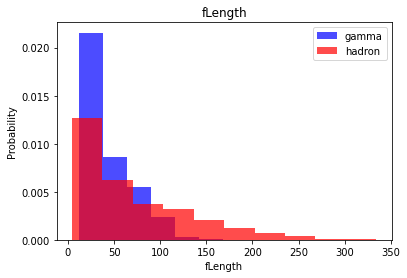

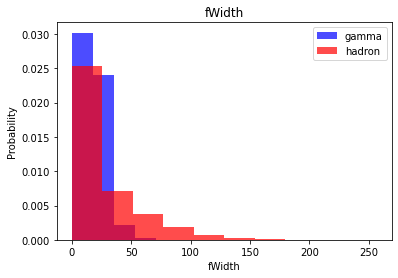

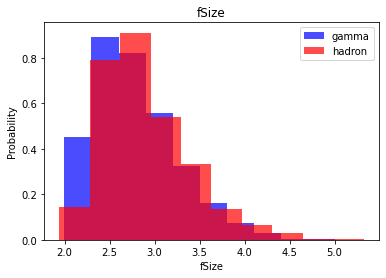

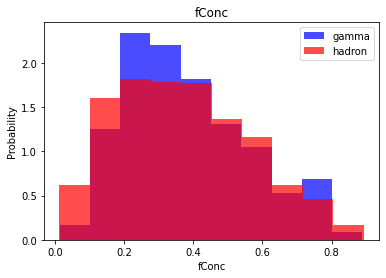

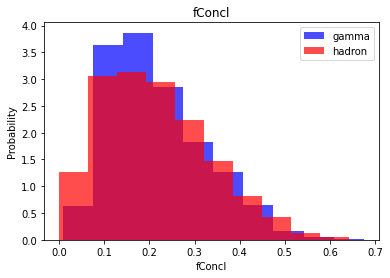

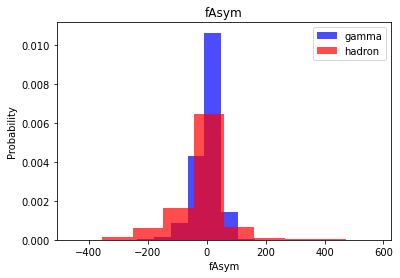

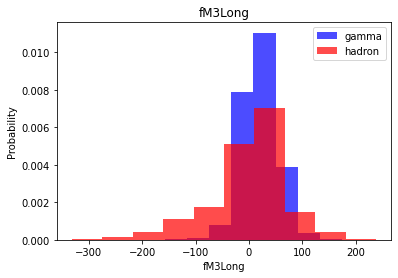

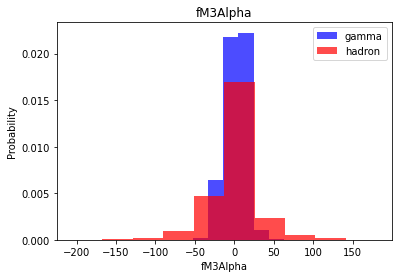

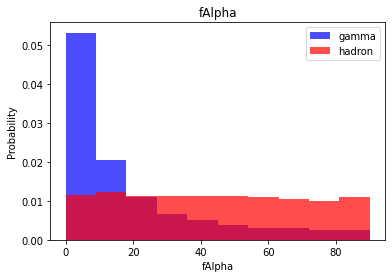

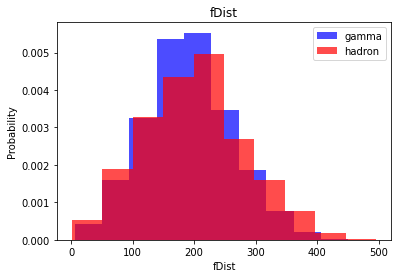

In [24]:
for label in col_names[:-1]:
    plt.hist(df[df["class"] == 1][label], color="blue", label="gamma", alpha=0.7, density=True)
    plt.hist(df[df["class"] == 0][label], color="red", label="hadron", alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [20]:
X_Data = df[df.columns[:-1]]
Y_Data = df["class"]

In [12]:
X_Data = X_Data.apply(lambda x: (x) / (x.max(axis=0)))

In [21]:
df = pd.concat([X_Data, Y_Data], axis=1)

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X_Data, Y_Data, test_size=0.2)

In [23]:
kNN = KNeighborsClassifier(n_neighbors=3)
kNN.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [25]:
kNN.score(X_test, Y_test)

0.8251840168243953